# 2장 사이킷런으로 시작하는 머신러닝

## 2.1 사이킷런 소개와 특징

- 사이킷런(scikit-learn): 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
- 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공

## 2.2 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

In [2]:
from sklearn.datasets import load_iris  # 붓꽃 데이터 세트 생성
from sklearn.tree import DecisionTreeClassifier  # 사용할 ML 알고리즘 (Decision Tree, 의사 결정 트리)
from sklearn.model_selection import train_test_split  # 데이터 세트를 학습 데이터와 테스트 데이터로 분리하는 함수

In [3]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가짐
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정값) 데이터를 numpy로 가짐 
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names) # iris_df는 붓꽃 데이터의 각 피처를 열로 가지는 DataFrame
iris_df['label'] = iris.target # 새로운 열로 레이블(타겟) 정보를 추가
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 레이블(Label, 결정값)은 0,1,2 세 가지 값으로 구성
- 0이 Setosa, 1이 versicolor, 2가 virginica 품종을 의미

### 학습용 데이터와 테스트용 데이터를 분리

- 사이킷런은 학습 데이터와 테스트 데이터의 분리를 위한 train_test_split() API를 제공
- train_test_split()을 이용하여 학습 데이터와 테스트 데이터를 test_size 파라미터 입력값의 비율로 분할
- test_size=0.2이면 전체 데이터 중 테스트 데이터가 20%, 학습 데이터가 80%
- random_state: 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, 
                                                    test_size=0.2, random_state=11)

- X_train : 학습용 피처 데이터 세트
- X_test : 테스트용 피처 데이터 세트
- y_train : 학습용 레이블 데이터 세트
- y_test : 테스트용 레이블 데이터 세트

### 의사 결정 트리를 이용해 학습과 예측을 수행

모델이 학습에 사용할 ML 알고리즘을 지정

- 학습용 데이터로 학습 수행: fit() 메서드
- 테스트용 데이터로 예측 수행: predict() 메서드

In [5]:
# 의사 결정 트리 클래스인 DecisionTreeClassifier 객체 생성 
# random_state: 예제 코드를 수행할 때마다 동일한 학습/예측 결과를 출력하기 위함
dt_clf = DecisionTreeClassifier(random_state=11)

# 학습용 데이터로학습 수행 
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
# 예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용해야 하며, 일반적으로 테스트 데이터 세트를 이용
pred = dt_clf.predict(X_test)

정확도: 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표

In [8]:
from sklearn.metrics import accuracy_score # 정확도 측정을 위한 accuracy_score() 함수
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) # param1: 실제 레이블 데이터 세트 / param2: 예측 레이블 데이터 세트

예측 정확도: 0.9333


## 2.3 사이킷런의 기반 프레임워크 익히기

### Estimator 이해 및 fit(), predict() 메서드

- fit(): 학습용 데이터로 ML 모델 학습
- predict(): 테스트용 데이터로 학습된 모델의 예측을 수행

**지도 학습**
- 분류(Classification) -> 사이킷런의 Classifier: 분류 알고리즘을 구현한 클래스
- 회귀(Regression) -> 사이킷런의 Regressor: 회귀 알고리즘을 구현한 클래스 

=> Classifier + Regressor = Estimator 클래스(지도학습의 모든 알고리즘을 구현한 클래스)

**비지도 학습**
- 차원 축소, 클러스터링, 피처 추출
- fit(): 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞춤
- transform() 적용: 입력 데이터의 차원 변환, 클러스터링 등의 실제 작업을 수행
- fit_transform(): fit()과 transform()을 하나로 결합해 수행

### 사이킷런의 주요 모듈

- **예제 데이터**
    - sklearn.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트
- **피처 처리**
    - sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공 -> 문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링
    - sklearn.feature_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공
    - sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출하는데 사용됨
- **피처 처리 & 차원 축소**
    - sklearn.decomposition : 차원 축소와 관련한 알고리즘을 지원하는 모듈 -> PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능 수행
- **데이터 분리, 검증 & 파라미터 튜닝**
    - sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치(Grid Search)로 최적 파라미터 추출 등의 API 제공
- **평가**
    - sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공 -> Accuracy, Precision, Recall, ROC-AUC, RMSE
- **ML 알고리즘**
    - sklearn.ensemble : 앙상블 알고리즘, 랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등을 제공
    - sklearn.linear_model : 주로 선형 회귀, 릿지, 라쏘 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원. SGD 관련 알고리즘 제공
    - sklearn.naive_bayes : 나이브 베이즈 알고리즘 제공 -> 가우시안 NB, 다항 분포 NB
    - sklearn.neighbors : 최근접 이웃 알고리즘 제공 -> K-NN
    - sklearn.svm : 서포트 벡터 머신 알고리즘 제공
    - sklearn.tree : 의사 결정 트리 알고리즘 제공
    - sklearn.cluster : 비지도 클러스터링 알고리즘 제공 -> K-평균, 계층형, DBSCAN
- **유틸리티**
    - sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공

### 내장된 예제 데이터 세트

- **분류나 회귀 연습용 예제 데이터**
    - **분류** 용도
        - datasets.load_breast_cancer() : 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트
        - datasets.load_digits() : 0에서 9까지 숫자의 이미지 픽셀 데이터 세트
        - datasets.load_iris() : 붓꽃에 대한 피처를 가진 데이터 세트
    - **회귀** 용도
        - datasets.load_boston() : 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트
        - datasets.load_diabetes() : 당뇨 데이터 세트
    
- **분류와 클러스터링을 위한 표본 데이터 생성기**
    - datasets.make_classifications()
        - 분류를 위한 데이터 세트 생성
        - 높은 상관도, 불필요한 속성 등의 노이즈 효과를 위한 데이터를 무작위로 생성
    - datasets.make_blobs()
        - 클러스터링을 위한 데이터 세트를 무작위로 생성
        - 군집 지정 개수에 따라 여러 가지 클러스터링을 위한 데이터 세트 생성

- 사이킷런에 내장된 데이터 세트는 일반적으로 **딕셔너리**(키+값) 형태
- **키**는 보통 data, target, target_name, feature_names, DESCR로 구성
    - data: 피처의 데이터 세트 (numpy.ndarray)
    - target: 분류 시 레이블 값 / 회귀 시 숫자 결괏값 데이터 세트 (numpy.ndarray)
    - target_names: 개별 레이블의 이름 (numpy.ndarray 또는 list)
    - feature)names: 피처의 이름 (numpy.ndarray 또는 list)
    - DESCR: 데이터 세트에 대한 설명과 각 피처의 설명 (string)

In [10]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data)) # Bunch 클래스 : 파이썬 딕셔너리 자료형과 유사

<class 'sklearn.utils._bunch.Bunch'>


In [12]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys) # 피처 데이터 값을 추출하기 위해서는 데이터 세트.data 또는 데이터 세트['data']를 이용

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
print('\n feature_names 의 type:',type(iris_data.feature_names))
print(' feature_names 의 shape:',len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names 의 type:',type(iris_data.target_names))
print(' feature_names 의 shape:',len(iris_data.target_names))
print(iris_data.target_names)

print('\n data 의 type:',type(iris_data.data))
print(' data 의 shape:',iris_data.data.shape)
print(iris_data['data'])

print('\n target 의 type:',type(iris_data.target))
print(' target 의 shape:',iris_data.target.shape)
print(iris_data.target)



 feature_names 의 type: <class 'list'>
 feature_names 의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names 의 type: <class 'numpy.ndarray'>
 feature_names 의 shape: 3
['setosa' 'versicolor' 'virginica']

 data 의 type: <class 'numpy.ndarray'>
 data 의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0

## 2.4 Model Selection 모듈 소개

- 사이킷런의 **model_selection** 모듈
    - 학습 데이터와 테스트 데이터 세트를 분리
    - 교차 검증 분할 및 평가
    - Estimator의 하이퍼 파라미터를 튜닝
- 이러한 것들을 위한 다양한 함수와 클래스 제공

### 학습/테스트 데이터 세트 분리 - train_test_split()

**Case 1. 학습 데이터와 테스트 데이터를 분리하지 않고, 학습 데이터 세트로만 학습하고 예측**

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 학습 데이터 세트로 학습 수행
iris = load_iris() # Iris 데이터 세트를 로딩
dt_clf = DecisionTreeClassifier() # 모델이 학습에 사용할 알고리즘으로 의사 결정 트리를 지정
train_data = iris.data # Iris 데이터 세트에서 피처(feature)만으로 된 데이터
train_label = iris.target # Iris 데이터 세트에서 레이블(결정값) 데이터
dt_clf.fit(train_data, train_label) # 학습 데이터 세트로 모델을 학습시킴

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:',accuracy_score(train_label, pred))  # 정확도가 100%, 이미 학습한 학습 데이터 세트를 기반으로 예측

예측 정확도: 1.0


**Case 2. 학습 데이터와 테스트 데이터를 분리한 뒤, 학습하고 예측**

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier( ) # 모델이 학습에 사용할 알고리즘으로 의사 결정 트리를 지정
iris_data = load_iris() # Iris 데이터 세트를 로딩

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.3, random_state=121) # 학습 데이터와 테스트 데이터를 분리

In [18]:
dt_clf.fit(X_train, y_train) # 학습 데이터로 학습 수행
pred = dt_clf.predict(X_test) # 테스트 데이터로 예측 수행
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9556


- **train_test_split()** 의 파라미터
    - test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정 (default=0.25)
    - train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정
    - shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지를 결정 (default=True)
    - random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값
    - train_test_split() 의 반환값은 튜플 형태
        - (학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트)

붓꽃 데이터는 150개의 데이터로, 데이터 양이 크지 않아 이를 통해 알고리즘의 예측 성능을 판단하기에는 적절하지 않음

-> 학습된 모델에 대해 다양한 데이터를 기반으로 예측 성능을 평가해야 함

### 교차 검증

- **과적합(Overfitting)**
    - 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
    - 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면, 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도
    - 따라서, 교차 검증을 이용해 더 다양한 학습과 평가를 수행
- **교차 검증**
    - 본고사(테스트 데이터 세트)를 치르기 전 모의고사(검증 세트)를 여러 번 보는 것
    - 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행
    - 대부분의 ML 모델의 성능 평가는 교차 검증 기반으로 1차 평가를 한 뒤에, 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스

**K 폴드 교차 검증**
- 가장 보편적으로 사용되는 교차 검증 기법
- 먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행
- K개의 예측 평가를 구한 뒤, 이 값의 평균을 K 폴드 평가 결과로 반영
- 사이킷런에서는 K 폴드 교차 검증 프로세스 구현을 위해 KFold와 StratifiedKFold 클래스를 제공

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris() # Iris 데이터 세트를 로딩
features = iris.data # Iris 데이터 세트에서 피처(feature)만으로 된 데이터
label = iris.target # Iris 데이터 세트에서 레이블(결정값) 데이터
dt_clf = DecisionTreeClassifier(random_state=156) # 모델이 학습에 사용할 알고리즘으로 의사 결정 트리를 지정

# k=5개의 폴드 세트로 분리하는 KFold 객체 생성
kfold = KFold(n_splits=5)
# 폴드 세트별 정확도를 담을 리스트 객체 생성
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [22]:
n_iter = 0  # 반복 횟수 초기화

# KFold 객체의 split()를 호출하면 폴드별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train) # 학습 데이터로 학습 수행
    pred = dt_clf.predict(X_test) # 검증용 테스트 데이터로 예측 수행
    
    # 반복 횟수 += 1
    n_iter += 1
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)  # 소수점 넷째자리까지 표기 (반올림)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 해당 폴드 세트의 정확도 추가
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


**Stratified K 폴드**
- **불균형한 분포도를 가진 레이블**(결정 클래스) 데이터 집합을 위한 K 폴드 방식
    - 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 경우
    - 위 경우, K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값의 비율을 제대로 반영하지 못하는 경우가 쉽게 발생
- K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결
- 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 학습과 검증 데이터 세트를 분배

In [23]:
import pandas as pd

iris = load_iris() # Iris 데이터 세트를 로딩 
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names) # 피처만으로 데이터 프레임을 구성
iris_df['label']=iris.target # 데이터 프레임에 레이블(결정값) 데이터를 추가
iris_df['label'].value_counts() # 해당 열에서 각 값들의 개수를 셈

label
0    50
1    50
2    50
Name: count, dtype: int64

In [28]:
kfold = KFold(n_splits=3) # k=3 교차 검증
n_iter = 0 # 반복 횟수 초기화
for train_index, test_index in kfold.split(iris_df):
    n_iter += 1 # 반복 횟수 += 1
    label_train = iris_df['label'].iloc[train_index] # 학습용 데이터의 인덱스를 기반으로 해당 row의 레이블 값 추출
    label_test = iris_df['label'].iloc[test_index] # 검증용 데이터의 인덱스를 기반으로 해당 row의 레이블 값 추출
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    50
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    50
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
2    50
Name: count, dtype: int64


첫 번째 교차 검증의 경우
- 학습 레이블 값에 1, 2만 존재
- 검증 레이블 값에 0만 존재

=> 0의 경우는 전혀 학습하지 못하여, 학습 모델은 **절대 0을 예측하지 못하는** 문제가 발생

하지만, **StratifiedKFold**는 이러한 문제를 해결 가능!

**레이블 데이터 분포도**에 따라 학습/검증 데이터를 나누기 때문에, split() 메서드에 인자로 피처 데이터 세트 + **레이블 데이터 세트**가 필요

In [29]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3) # 폴드 세트를 3개로 설정
n_iter=0 # 반복 횟수 초기화

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1 # 반복 횟수 += 1
    label_train= iris_df['label'].iloc[train_index] # 학습용 데이터의 인덱스를 기반으로 해당 row의 레이블 값 추출
    label_test = iris_df['label'].iloc[test_index] # 검증용 데이터의 인덱스를 기반으로 해당 row의 레이블 값 추출
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포:
 label
1    17
2    17
0    16
Name: count, dtype: int64


학습 레이블과 검증 레이블 데이터 값의 분포도가 거의 동일하게 할당되었음을 알 수 있음

Stratified K 폴드의 경우 왜곡된 데이터 세트에서는 반드시 Stratified K 폴드를 이용해 교차 검증을 해야 함

In [30]:
dt_dif = DecisionTreeClassifier(random_state=156) # 모델이 학습에 사용할 알고리즘으로 의사 결정 트리를 지정

skfold = StratifiedKFold(n_splits=3) # 폴드 세트를 3개로 설정
n_iter=0 # 반복 횟수 초기화
cv_accuracy=[] # 각 세트의 정확도를 담을 리스트

# StraitifiedKFold의 split() 호출시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    
    # split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train) # 학습용 데이트로 학습 수행
    pred =dt_clf.predict(X_test) # 검증용 테스트 데이터로 예측 수행
    
    # 반복 횟수 += 1
    n_iter += 1 
    
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
         .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))
    
    # 해당 세트의 정확도 추가
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


**교차 검증을 보다 간편하게 - cross_val_score()**

- 사이킷런은 교차 검증을 좀 더 편리하게 수행할 수 있게 해주는 API를 제공 -> 대표적으로 **cross_val_score()**
- 다음의 일련의 과정을 한꺼번에 수행해주는 API
    - 폴드 세트 설정
    - for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
    - 반복적으로 학습과 예측 수행, 예측 성능 반환
- **cross_val_score(estimator, X, y=None, scoring=None, cv=None)**
    - estimator : Classifier 또는 Regressor
    - X : 피처 데이터 세트
    - y : 레이블 데이터 세트
    - scoring : 예측 성능 평가 지표
    - cv : 교차 검증 폴드 수
- estimator로 **classifier**가 입력되면 **Stratified K 폴드** 방식으로 레이블 값의 분포에 따라 학습/테스트 세트를 분할
- 내부적으로 StratifiedKFold 를 이용하여 Estimator를 학습(fit), 예측(predict), 평가(evaluation)를 자동으로 수행

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris() # iris = load_iris() # Iris 데이터 세트를 로딩
dt_clf = DecisionTreeClassifier(random_state=156) # 모델이 학습에 사용할 알고리즘으로 의사 결정 트리를 지정

data = iris_data.data # Iris 데이터 세트에서 피처(feature)만으로 된 데이터
label = iris_data.target # Iris 데이터 세트에서 레이블(결정값) 데이터

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도 [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

**GridSearchCV**
- 하이퍼파라미터의 '그리드(grid)'를 정의하고, 정의된 그리드의 모든 조합에 대해 교차 검증을 사용하여 모델을 평가
- **하이퍼파라미터**를 어떻게 조합해야 모델이 예측을 제일 잘 할지 여러 조합을 시도해보고, 평가는 **교차 검증**으로 수행
- Classifier나 Regressor와 같은 알고리즘에 사용되는 **하이퍼 파라미터**를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있음
    - **하이퍼 파라미터**
        - 머신러닝 알고리즘을 구성하는 주요 구성 요소로, 이 값을 조정해 알고리즘의 예측 성능을 개선 가능
- **교차 검증**을 기반으로 이 **하이퍼 파라미터의 최적 값**을 찾게 해줌
    - 데이터 세트를 교차 검증을 위한 학습/테스트 세트로 자동으로 분할
    - **하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용**
    => 최적의 파라미터를 찾을 수 있음
- 하지만 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸리는 것에 유념해야 함
- GridSearchCV의 파라미터
    - estimator
        - classifier, regressor, pipeline이 사용될 수 있음
    - param_grid
        - key + 리스트 값을 가지는 딕셔너리가 주어짐
        - estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
    - scoring
        - 예측 성능을 측정할 평가 방법 지정
    - cv
        - 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정
    - refit
        - True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴
        - default: True

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris() # Iris 데이터 로딩
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121) # 학습 데이터와 테스트 데이터 분리
dtree = DecisionTreeClassifier() # 모델이 학습에 사용할 알고리즘으로 의사 결정 트리를 지정

# parameter 들을 딕셔너리 형태로 설정
# DecisionTreeClassifier의 중요 하이퍼 파라미터인 max_depth와 min_sample_split의 값을 변화시키면서 최적화 진행
# 총 6회에 걸쳐 파라미터를 순차적으로 바꿔 실행하면서 최적의 파라미터와 수행 결과를 도출
parameters = {'max_depth':[1, 2, 3], 'min_samples_split':[2, 3]}

In [38]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정  
# refit=True이면 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


하이퍼 파라미터 max_depth와 min_samples_split을 순차적으로 총 6번 변경하면서 학습/평가를 수행
- 'params' : 수행할 때마다 적용된 개별 하이퍼 파라미터값
- 'mean_test_score' : 해당 하이퍼 파라미터 조합을 적용했을 때 모든 폴딩 세트에서의 테스트 성능 수치의 평균
- 'rank_test_score' : 해당 하이퍼 파라미터 조합을 적용했을 때 예측 성능 순위 (1위가 최적의 하이퍼 파라미터)
- split0_test_score: 0번 폴딩 세트에서 테스트한 성능 수치
- split1_test_score: 1번 폴딩 세트에서 테스트한 성능 수치
- split2_test_score: 2번 폴딩 세트에서 테스트한 성능 수치

최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_ 속성에 기록됨

In [39]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [41]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


## 2.5 데이터 전처리

- **데이터에 대해 미리 처리해야 할 기본 사항**
    - 결손값(NaN, Null 값)은 허용되지 않음
        - Null 값은 고정된 다른 값으로 변환해야 함
        - 피처 값 중 Null 값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대체 가능
        - 하지만 Null 값이 대부분이라면 오히려 해당 피처는 드롭하는 것이 좋음
    - 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않음
        - 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 함
        - 카테고리형 피처는 코드 값으로 표현
        - 텍스트형 피처는 피처 벡터화(feature vectorization) 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제

### 데이터 인코딩

**레이블 인코딩(Label encoding)**

카테고리 피처를 코드형 숫자 값으로 변환

In [46]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items) # 해당 데이터들로 각 카데고리 별 인코딩을 미리 학습
labels = encoder.transform(items) # 각 데이터에 인코딩을 실제 적용
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


데이터가 많은 경우, 문자열 값이 어떤 숫자 값으로 인코딩됐는지 직관적으로 알 수 없음

-> LableEncoder 객체의 **classes_** 속성값으로 확인
-> 0번부터 순서대로 변환된 인코딩 값에 대한 원본값을 가짐

In [47]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


'TV'가 0번, '냉장고'가 1번, '믹서'가 2번... 으로 인코딩 되었음을 알 수 있음

**inverse_transform()** 을 통해 인코딩된 값을 다시 디코딩할 수 있음

In [45]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 몇몇 ML 알고리즘에는 레이블 인코딩를 적용할 경우 예측 성능이 떨어지는 경우 발생
    - 숫자 값의 경우, 크고 작음에 대한 특성이 작용하기 때문
    - 냉장고가 1, 믹서가 2로 변환되면 1보다 2가 더 큰 값이므로 특정 ML 알고리즘에서 가중치가 더 부여되거나 더 중요하게 인식
- 숫자의 이러한 특성으로 인해 레이블 인코딩은 **선형 회귀**와 같은 ML 알고리즘에는 적용하지 않아야 함
- 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 적용해도 괜찮음

**원-핫 인코딩(One-Hot encoding)**

- 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고, 나머지 칼럼에는 0을 표시하는 방식
- 원-핫 : 여러 개의 속성 중 단 한 개의 속성만 1로 표시
- 사이킷런에서 **OneHotEncoder** 클래스로 변환 가능
    - 입력값으로 2차원 데이터가 필요
    - OneHotEncoder를 이용해 변환한 값 : 희소 행렬(Sparse Matrix) 형태
    - toarray() 메서드를 이용해 밀집 행렬(Dense Matrix)로 변환 필요

In [52]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items) # 해당 데이터들로 각 카데고리 별 인코딩을 미리 학습
oh_labels = oh_encoder.transform(items) # 각 데이터에 인코딩을 실제 적용

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


- STEP 1: TV가 0, 냉장고 1, 믹서 2, 선풍기 3, 전자레인지 4, 컴퓨터가 5로 인코딩
- STEP 2: 각각 [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]로 인코딩

**get_dummies()**
- 원-핫 인코딩을 더 쉽게 지원하는 API
- 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환

In [54]:
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


### 피처 스케일링과 정규화

- **표준화(Standardization)**
    - **평균이 0이고 분산이 1**인 가우시안 정규 분포를 가진 값으로 변환하는 것

$x_i\_new=\frac{x_i-mean}{stdev(x)}$

- **정규화(Normalization)**
    - 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
    - 모두 동일한 크기 단위로 비교하기 위해 값을 **모두 최소 0 ~ 최대 1의 값으로** 변환하는 것
    - 개별 데이터의 크기를 모두 똑같은 단위로 변경

$x_i\_new=\frac{x_i-min(x)}{max(x)-min(x)}$

- **사이킷런의 Normalizer 모듈**
    - 일반적인 정규화와 약간의 차이 존재
    - 개별 벡터의 크기를 맞추기 위해 변환하는 것
    - 개별 벡터를 모든 피처 벡터의 크기로 나누는 것

$x_i\_new=\frac{x_i}{\sqrt{x_i^2+y_i^2+z_i^2}}$

**StandardScaler**

- **표준화**를 쉽게 지원하기 위한 클래스
- 가우시안 정규 분포를 가질 수 있도록 개별 피처를 **평균이 0이고 분산이 1**인 값으로 변환
- 사이킷런에서 구현한 RBF 커널을 이용하는 서포트 벡터 머신, 선형 회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되었기 때문에, 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요

In [56]:
from sklearn.datasets import load_iris
import pandas as pd

# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [57]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환 -> fit( ) 과 transform( ) 호출 
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform( ) 시 scale 변환된 데이터 셋이 numpy.ndarry로 반환 -> 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


모든 칼럼 값의 평균이 0에 아주 가까운 값으로, 분산은 1에 아주 가까운 값으로 변환되는 스케일링이 적용되었음을 알 수 있음

**MinMaxScaler**

- 데이터 값을 **0과 1 사이의 범위 값**으로 변환
- 음수 값이 있으면 -1에서 1 사이의 범위 값으로 변환

In [58]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환 -> fit() 과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform() 시 scale 변환된 데이터 셋이 numpy.ndarry로 반환 -> 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


모든 피처에 0에서 1 사이의 값으로 변환되는 스케일링이 적용되었음을 알 수 있음

### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

- fit(): 데이터 변환을 위한 기준 정보 설정을 적용
- transform(): 이렇게 설정된 정보를 이용해 실제 데이터의 변환 수행
- fit_transform(): fit()과 transform()을 한번에 적용

**학습 데이터 세트와 테스트 데이터 세트에 fit()과 transform()을 적용할 때 유의점**
- Scaler 객체를 이용해 **학습 데이터 세트로 fit()과 transform()** 을 적용
- **테스트 데이터 세트로는 다시 fit()을 수행하지 않고, 학습 데이터 세트로 fit()을 수행한 결과를 이용해 transform() 변환**

**Case 1. 테스트 데이터에 fit()을 적용할 경우**

In [60]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [64]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# MinMaxScaler에 학습 데이터를 fit() 하게 되면 원본 데이터의 최솟값이 0, 최댓값이 10으로 설정됨
scaler.fit(train_array)

# 1/10 scale로 학습 데이터 변환
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [65]:
# MinMaxScaler에 테스트 데이터를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 테스트 데이터 변환
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


학습 데이터와 테스트 데이터의 스케일링이 맞지 않는 결과 발생

-> 머신러닝 모델은 학습 데이터를 기반으로 학습되기 때문에 반드시 **테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 함**

**Case 2. 테스트 데이터에 fit()을 적용하지 않고, 학습 데이터로 fit()을 수행한 결과를 이용해 transform() 변환**

In [66]:
scaler = MinMaxScaler()
scaler.fit(train_array) # 학습 데이터 세트 fit() -> 1/10 스케일링
train_scaled = scaler.transform(train_array) # 학습 데이터 세트에 1/10 스케일링 적용
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함
test_scaled = scaler.transform(test_array) # 테스트 데이터 세트에 1/10 스케일링 적용
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


**fit_transform()** 은 fit()과 transform()을 순차적으로 수행하는 메서드이므로, 학습 데이터에서는 상관없지만 **테스트 데이터에서는 절대 사용해서는 안됨**

## 2.6 사이킷런으로 수행하는 타이타닉 생존자 예측 

**캐글**
- 세계적인 ML 기반 분석 대회를 온라인상에서 주관
- 오픈된 데이터 자료를 기반으로 전 세계 데이터 분석가가 데이터 분석 실력을 경쟁하고 협업하는 가장 뛰어난 데이터 분석 오픈 포털

**타이타닉 탑승자 데이터**
- Passengerid
    - 탑승자 데이터 일련번호
- Survived
    - 생존 여부
    - 0=사망, 1=생존
- Pclass
    - 티켓의 선실 등급
    - 1=일등석, 2=이등석, 3=삼등석
- Sex
    - 탑승자 성별
- Name
    - 탑승자 이름
- Age
    - 탑승자 나이
- Sibsp
    - 같이 탑승한 형제자매 또는 배우자 인원수
- Parch
    - 같이 탑승한 부모님 또는 어린이 인원수
- Ticket
    - 티켓 번호
- Fare
    - 요금
- Cabin
    - 선실 번호
- Embarked
    - 중간 정착 항구 C=Cherbourg, Q=Queenstown, S=Southampton

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [69]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info()) # 로딩된 데이터 컬럼 타입 확인


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않음

-> DataFrame의 **fillna()** 함수를 사용해 Null 값을 평균 또는 고정 값으로 변경

In [70]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True) # 평균 값으로 변경
titanic_df['Cabin'].fillna('N',inplace=True) # 'N' 값으로 변경
titanic_df['Embarked'].fillna('N',inplace=True) # 'N' 값으로 변경
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [71]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것으로 추정

-> Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요 -> **앞 문자만 추출**

In [72]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


**성별에 따른 생존 확률 비교**

In [73]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

**시본(Seaborn)** 패키지
- 기본적으로 맷플롯립에 기반
- 좀 더 세련된 비주얼과 쉬운 API
- 편리한 판다스 DataFrame과의 연동

<Axes: xlabel='Sex', ylabel='Survived'>

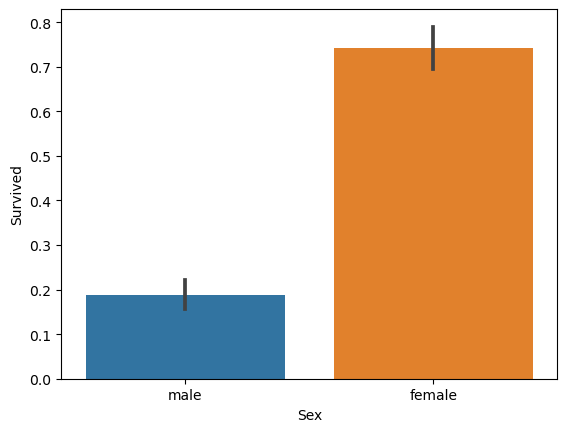

In [74]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

남자보다 여자의 생존 확률이 더 높았음을 알 수 있음

**부자와 가난한 사람 간의 생존 확률 비교** -> 객실 등급으로 판단

<Axes: xlabel='Pclass', ylabel='Survived'>

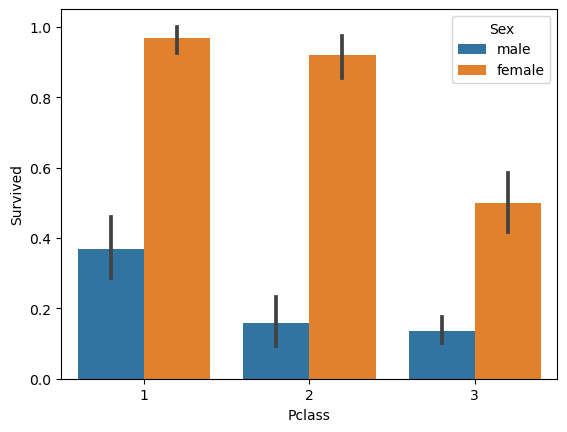

In [75]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

**Age에 따른 생존 확률 비교**

Age의 경우 값 종류가 많기 때문에, 범위별로 분류해 카테고리 값을 할당

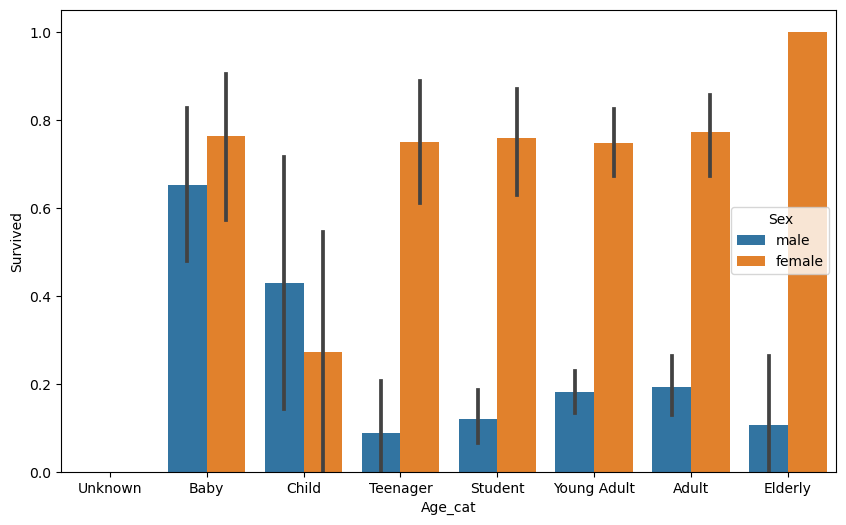

In [77]:
# 입력 age에 따라 구분값을 반환하는 함수 설정 -> DataFrame의 apply lambda식에 사용
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

# X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True) # 다시 'Age_cat' 칼럼을 삭제

**문자열 카테고리 피처를 숫자형 카테고리 피처로 변환**

사이킷런의 LabelEncoder 클래스를 이용해 레이블 인코딩 적용

In [78]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder() # LabelEncoder 객체 생성
        le = le.fit(dataDF[feature]) # 각 feature에 대한 인코딩 학습
        dataDF[feature] = le.transform(dataDF[feature]) # 실제 데이터에 인코딩 적용, 해당 컬럼 변경
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


Sex, Cabin, Embarked 속성이 숫자형으로 인코딩된 것을 알 수 있음

**STEP 1. 전처리 함수 정의**
- transform_features() 함수
    - Null 처리
    - 불필요한 피처 제거
    - 인코딩을 수행하는 내부 함수
    
=> 데이터의 전처리를 전체적으로 호출

In [79]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

**STEP 2. 원본 데이터 가공**

In [80]:
# 원본 데이터를 재로딩 하고, feature 데이터 셋과 Label 데이터 셋 추출
titanic_df = pd.read_csv('./titanic_train.csv') # 원본 데이터 재로딩
y_titanic_df = titanic_df['Survived'] # 레이블(결정값) 데이터 추출
X_titanic_df= titanic_df.drop('Survived',axis=1) # 레이블(결정값) 속성을 드롭해 피처 데이터 세트 생성

X_titanic_df = transform_features(X_titanic_df) # 피처 데이터 세트에 데이터 전처리 함수 적용

**STEP 3. 학습용 데이터와 테스트 데이터 분리**

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11) # 학습용 데이터와 테스트 데이터 분리

**STEP 4. 각 ML 알고리즘을 사용해 모델 학습/예측/평가**

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 의사 결정 트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생 성
dt_clf = DecisionTreeClassifier(random_state=11) # random_state : 예제를 수행할 때마다 같은 결과를 출력하기 위한 용도
rf_clf = RandomForestClassifier(random_state=11) # random_state : 예제를 수행할 때마다 같은 결과를 출력하기 위한 용도 # solver='liblinear'
lr_clf = LogisticRegression(solver='liblinear') # solver='liblinear' : 로지스틱 회귀의 최적화 알고리즘을 liblinear로 설정 (작은 데이터 세트의 이진 분류에서 좋은 성능)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


**STEP 5. 교차 검증으로 모델 평가**

- KFold 클래스 이용

In [84]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    
    kfold = KFold(n_splits=folds) # 폴드 세트가 5개인 KFold 객체를 생성
    scores = [] # 예측 결과 저장을 위한 리스트 객체 생성
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) # 학습용 데이터로 학습 수행
        predictions = clf.predict(X_test) # 검증 테스트 데이터로 예측 수행
        accuracy = accuracy_score(y_test, predictions) # 정확도 계산
        scores.append(accuracy) # 결과 리스트에 정확도 추가
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
    
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


- cross_val_score() 이용 (StratifiedKFold)

In [85]:
# cross_val_score()는 StratifiedKFold를 이용해 폴드 세트를 분할
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도: 0.7879


- GridSearchCV 이용

In [86]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
